In [31]:
import pandas as pd

# List of column headers you want to select
selected_columns = ['spectrometer_frequency(MHz)', 'voltage(mV)', 'pulse_frequency(MHz)']  # Replace these with actual column headers

# Assuming 'test.txt' is a comma-separated values (CSV) file
data = pd.read_csv('freqvsvoltage.txt', usecols=selected_columns)

# Now `data` contains only the selected columns from 'test.txt'
print(data)

   spectrometer_frequency(MHz)  voltage(mV)  pulse_frequency(MHz)
0                         5.00       1032.0                    10
1                       600.00        280.0                   600
2                       500.00        344.5                   500
3                        50.00        800.0                    50
4                       213.16        568.0                   205


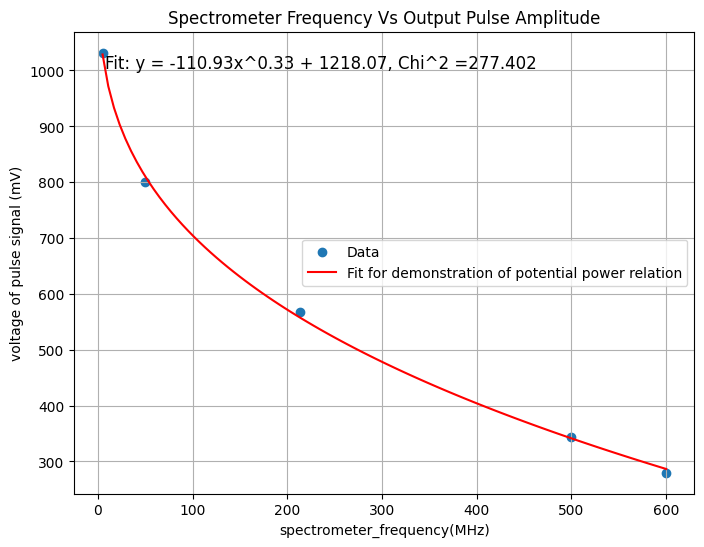

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

# Define the function you want to plot
def custom_function(x, A, C, D):
    return A*x**C + D

# Use the data loaded from the previous step
x_data = data['spectrometer_frequency(MHz)'].values  # Replace 'x_column' with the actual column name for x
y_data = data['voltage(mV)'].values  # Replace 'y_column' with the actual column name for y

# Perform the chi-squared fit
popt, pcov = curve_fit(custom_function, x_data, y_data)

# Optimal values for m and c
A_optimal, C_optimal, D_optimal = popt

#calculate chi^2
residuals = y_data - custom_function(x_data, *popt)
chi_squared = np.sum(residuals**2)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted function
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = custom_function(x_fit, A_optimal, C_optimal, D_optimal)
plt.plot(x_fit, y_fit, color='red', label=f'Fit for demonstration of potential power relation')


# Display function and fit parameters in the graph
plt.text(0.05, 0.95, f'Fit: y = {A_optimal:.2f}x^{C_optimal:.2f} + {D_optimal:.2f}, Chi^2 ={chi_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
title = 'Spectrometer Frequency Vs Output Pulse Amplitude'
label = 'Fit for demonstration of potential power relation'

#plt.plot(x_data, y_data, color='red', label=f'{label}')
#plt.scatter(x_data, y_data, marker = 'x', cmap='fusion')

plt.xlabel('spectrometer_frequency(MHz)')
plt.ylabel('voltage of pulse signal (mV)')
plt.title(f'{title}')
plt.legend(loc = 7)
plt.grid(True)
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_4132\4188698797.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_data, y_data, marker = 'x', cmap='fusion')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


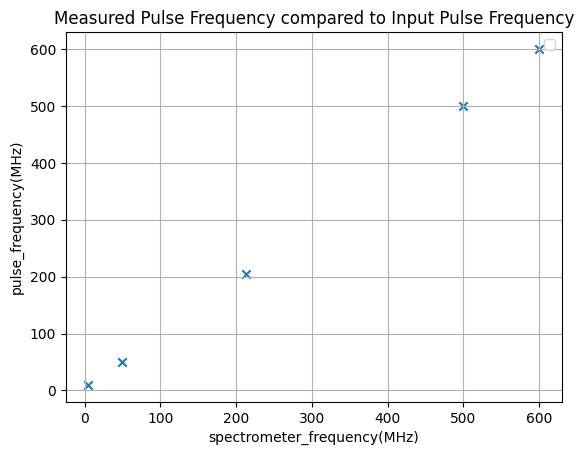

In [45]:
x_data = data['spectrometer_frequency(MHz)'].values  # Replace 'x_column' with the actual column name for x
y_data = data['pulse_frequency(MHz)'].values  # Replace 'y_column' with the actual column name for y
#plt.plot(x_data, y_data, color='red', label=f'{label}')
plt.scatter(x_data, y_data, marker = 'x', cmap='fusion')

plt.xlabel('spectrometer_frequency(MHz)')
plt.ylabel('pulse_frequency(MHz)')
plt.title(f'Measured Pulse Frequency compared to Input Pulse Frequency')
plt.legend()
plt.grid(True)
plt.show()
